In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm.notebook import tqdm

In [19]:
data = np.genfromtxt('tsp.txt', delimiter=',')
print(data)

[[0.858  0.3911]
 [0.324  0.8831]
 [0.1497 0.6673]
 ...
 [0.7843 0.4749]
 [0.6449 0.1651]
 [0.8406 0.4509]]


In [409]:
import math
pi = math.pi

def PointsInCircum(r,n=100):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

circle_points = PointsInCircum(0.5,36)
circle_points = list(circle_points); random.shuffle(circle_points)

In [398]:
circle_points

[(0.5, 0.0),
 (0.383022221559489, 0.3213938048432696),
 (0.08682408883346521, 0.492403876506104),
 (-0.2499999999999999, 0.43301270189221935),
 (-0.46984631039295416, 0.17101007166283444),
 (-0.4698463103929542, -0.17101007166283433),
 (-0.2500000000000002, -0.43301270189221924),
 (0.08682408883346499, -0.49240387650610407),
 (0.3830222215594889, -0.3213938048432698),
 (0.5, -1.2246467991473532e-16)]

In [374]:
test_data = circle_points

In [322]:
test_data = data

In [441]:
[(math.cos(2*pi/36*x)*0.5,math.sin(2*pi/36*x)*0.5) for x in range(0,36+1)]

[(0.5, 0.0),
 (0.492403876506104, 0.08682408883346517),
 (0.4698463103929542, 0.17101007166283436),
 (0.43301270189221935, 0.24999999999999997),
 (0.383022221559489, 0.3213938048432696),
 (0.3213938048432697, 0.383022221559489),
 (0.25000000000000006, 0.4330127018922193),
 (0.1710100716628344, 0.46984631039295416),
 (0.08682408883346521, 0.492403876506104),
 (3.061616997868383e-17, 0.5),
 (-0.08682408883346515, 0.492403876506104),
 (-0.17101007166283436, 0.4698463103929542),
 (-0.2499999999999999, 0.43301270189221935),
 (-0.3213938048432697, 0.383022221559489),
 (-0.38302222155948895, 0.32139380484326974),
 (-0.43301270189221935, 0.24999999999999997),
 (-0.46984631039295416, 0.17101007166283444),
 (-0.492403876506104, 0.08682408883346535),
 (-0.5, 6.123233995736766e-17),
 (-0.49240387650610407, -0.08682408883346501),
 (-0.4698463103929542, -0.17101007166283433),
 (-0.4330127018922194, -0.24999999999999986),
 (-0.383022221559489, -0.3213938048432696),
 (-0.32139380484326974, -0.38302222

In [402]:
%%time
shortest_iteration_series = []
longest_iteration_series = []
shortest_dist_best = np.infty
longest_dist_best = 0
for epoch in tqdm(range(50000)):
    iter_data = list(test_data); random.shuffle(iter_data)
    iter_data = np.vstack([iter_data,iter_data[0]])
    total_dist = 0
    for i in range(len(iter_data)-1):
        node_dist = np.sqrt((iter_data[i+1][1]-iter_data[i][1])**2+(iter_data[i+1][0]-iter_data[i][0])**2)
        total_dist += node_dist
    #total_dist +=  np.sqrt((iter_data[0][1]-iter_data[len(iter_data)-1][1])**2+(iter_data[len(iter_data)-1][0]-iter_data[0][0])**2)
    if total_dist<shortest_dist_best:
        shortest_dist_best=total_dist
        shortest_path = iter_data
        shortest_iteration_series.append((epoch,total_dist))
        #print("Epoch "+str(epoch)+": "+str(total_dist))
        #print("Epoch "+str(epoch)+": "+str(total_dist)+"\r", end="")
        #print("Best one yet!")
    if total_dist>longest_dist_best:
        longest_dist_best=total_dist
        longest_path = iter_data
        longest_iteration_series.append((epoch,total_dist))
        #print("Epoch "+str(epoch)+": "+str(total_dist))
        #print("Epoch "+str(epoch)+": "+str(total_dist)+"\r", end="")
        #print("Best one yet!")
    #if epoch%1000 ==0:
     #   print("Completed " + str(epoch) + " Epochs")#\r", end="")
shortest_iteration_series = np.asarray(shortest_iteration_series)
shortest_path= np.asarray(shortest_path)
longest_iteration_series = np.asarray(longest_iteration_series)
longest_path= np.asarray(longest_path)
        
        ##Can we do the profiling to see possible bottlenecks??

  0%|          | 0/50000 [00:00<?, ?it/s]

Wall time: 11.8 s


In [400]:
len(test_data)

37

In [405]:
longest_iteration_series

array([[0.00000000e+00, 2.47569624e+01],
       [1.00000000e+00, 2.69340111e+01],
       [1.50000000e+01, 2.78173605e+01],
       [1.80000000e+01, 2.78311182e+01],
       [3.10000000e+01, 2.80755359e+01],
       [5.70000000e+01, 2.88705306e+01],
       [1.65000000e+02, 2.89755371e+01],
       [6.34000000e+02, 2.93403521e+01],
       [1.67800000e+03, 2.96820843e+01],
       [1.94000000e+03, 2.97588445e+01],
       [5.76200000e+03, 2.98813735e+01],
       [1.04050000e+04, 3.04999419e+01],
       [1.15220000e+04, 3.06277885e+01],
       [1.53440000e+04, 3.09296904e+01],
       [2.26400000e+04, 3.12631029e+01]])

In [406]:
shortest_iteration_series

array([[0.00000000e+00, 2.47569624e+01],
       [2.00000000e+00, 2.38294427e+01],
       [4.00000000e+00, 2.21561946e+01],
       [1.20000000e+01, 2.04444880e+01],
       [1.02000000e+02, 2.01477382e+01],
       [2.13000000e+02, 2.00146740e+01],
       [2.67000000e+02, 1.94838686e+01],
       [4.22000000e+02, 1.93487285e+01],
       [7.10000000e+02, 1.93288711e+01],
       [1.31000000e+03, 1.90767446e+01],
       [2.02000000e+03, 1.90141305e+01],
       [2.30600000e+03, 1.75321386e+01],
       [6.34900000e+03, 1.64827429e+01],
       [3.44760000e+04, 1.60918053e+01]])

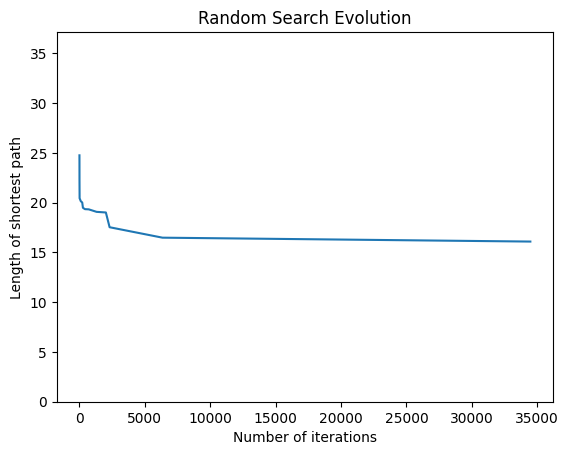

In [408]:
plt.ylim(0,1.5*max(shortest_iteration_series[:,1]))
plt.plot(shortest_iteration_series[:,0],shortest_iteration_series[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Length of shortest path")
plt.title("Random Search Evolution")
plt.show()

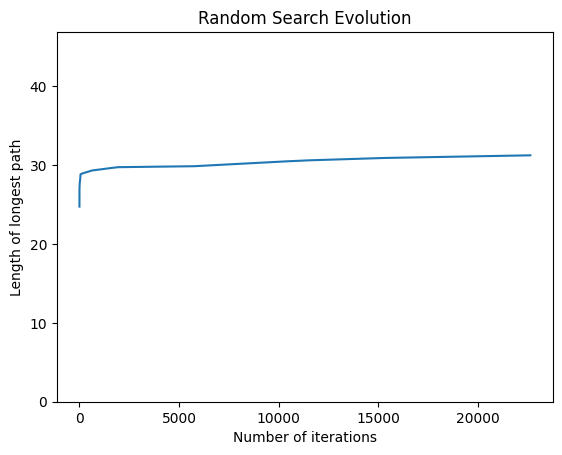

In [407]:
plt.ylim(0,1.5*max(longest_iteration_series[:,1]))
plt.plot(longest_iteration_series[:,0],longest_iteration_series[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Length of longest path")
plt.title("Random Search Evolution")
plt.show()

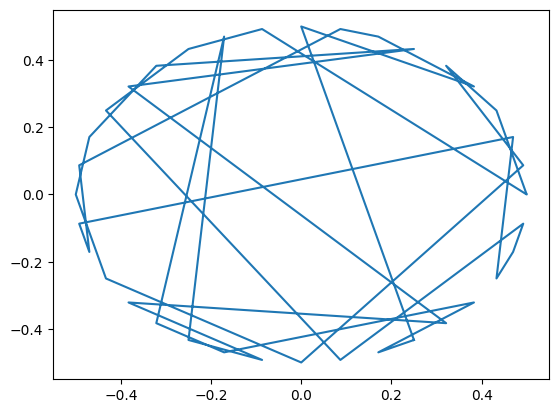

In [403]:
plt.plot(shortest_path[:,0],shortest_path[:,1])
plt.show()

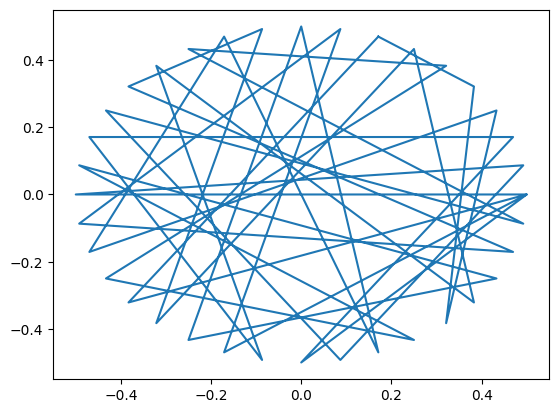

In [404]:
plt.plot(longest_path[:,0],longest_path[:,1])
plt.show()

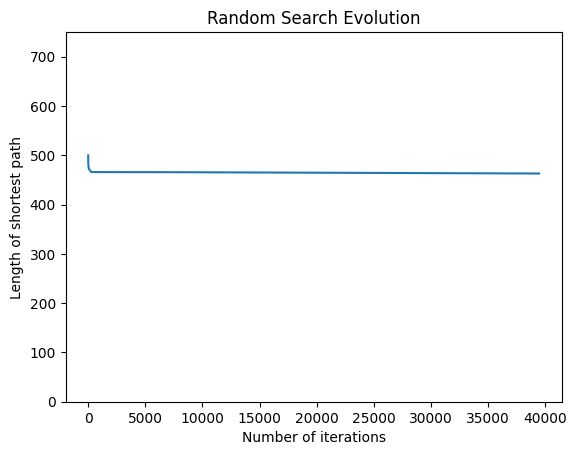

In [325]:
plt.ylim(0,1.5*max(shortest_iteration_series[:,1]))
plt.plot(shortest_iteration_series[:,0],shortest_iteration_series[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Length of shortest path")
plt.title("Random Search Evolution")
plt.show()

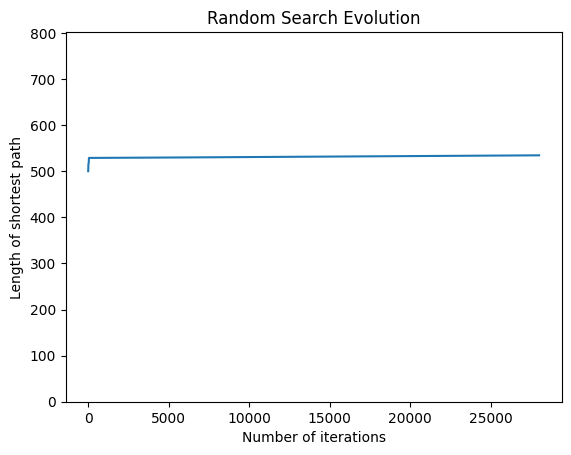

In [326]:
plt.ylim(0,1.5*max(longest_iteration_series[:,1]))
plt.plot(longest_iteration_series[:,0],longest_iteration_series[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Length of shortest path")
plt.title("Random Search Evolution")
plt.show()

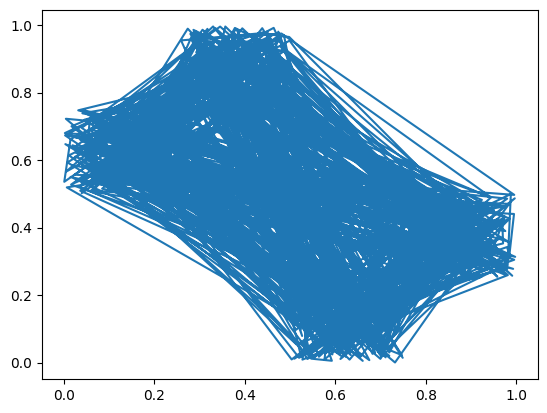

In [327]:
plt.plot(shortest_path[:,0],shortest_path[:,1])
plt.show()

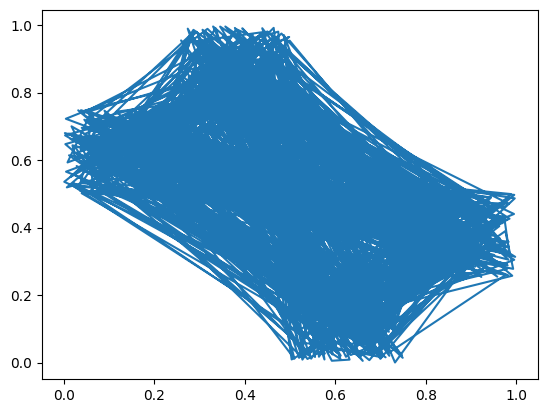

In [328]:
plt.plot(longest_path[:,0],longest_path[:,1])
plt.show()


# Hill Climber

In [359]:
real_data_hc_output = output

In [430]:
current_data = data
output = []
shortest_dist = np.infty
shortest_iteration_series = []
#before swapping
for i in range(len(current_data)-1):
    node_dist = np.sqrt((current_data[i+1][1]-current_data[i][1])**2+(current_data[i+1][0]-current_data[i][0])**2)
    current_dist += node_dist
current_dist += np.sqrt((current_data[len(current_data)-1][1]-current_data[0][1])**2+(current_data[len(current_data)-1][0]-current_data[0][0])**2)
for epoch in tqdm(range(50000)):
    swap_index = random.randint(0,len(current_data)-2)
    new_data = current_data.copy() #for swapping
    new_data[swap_index], new_data[swap_index+1] = current_data[swap_index+1], current_data[swap_index]
    new_dist = 0
    for i in range(len(new_data)-1):
        node_dist = np.sqrt((new_data[i+1][1]-new_data[i][1])**2+(new_data[i+1][0]-new_data[i][0])**2)
        new_dist += node_dist
    new_dist += np.sqrt((new_data[len(new_data)-1][1]-new_data[0][1])**2+(new_data[len(new_data)-1][0]-new_data[0][0])**2)
    if new_dist<shortest_dist:
        shortest_dist = new_dist
        shortest_path = new_data
        current_data = new_data
        shortest_iteration_series.append((epoch,new_dist))
shortest_iteration_series = np.asarray(shortest_iteration_series)
shortest_path= np.asarray(shortest_path)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [431]:
current_data = data
current_dist = 0
longest_dist = 0
longest_iteration_series = []
#before swapping
for i in range(len(current_data)-1):
    node_dist = np.sqrt((current_data[i+1][1]-current_data[i][1])**2+(current_data[i+1][0]-current_data[i][0])**2)
    current_dist += node_dist
current_dist += np.sqrt((current_data[len(current_data)-1][1]-current_data[0][1])**2+(current_data[len(current_data)-1][0]-current_data[0][0])**2)
for epoch in tqdm(range(50000)):
    swap_index = random.randint(0,len(current_data)-2)
    new_data = current_data.copy() #for swapping
    new_data[swap_index], new_data[swap_index+1] = current_data[swap_index+1], current_data[swap_index]
    new_dist = 0
    for i in range(len(new_data)-1):
        node_dist = np.sqrt((new_data[i+1][1]-new_data[i][1])**2+(new_data[i+1][0]-new_data[i][0])**2)
        new_dist += node_dist
    new_dist += np.sqrt((new_data[len(new_data)-1][1]-new_data[0][1])**2+(new_data[len(new_data)-1][0]-new_data[0][0])**2)
    if new_dist>longest_dist:
        longest_dist = new_dist
        longest_path = new_data
        current_data = new_data
        longest_iteration_series.append((epoch,new_dist))
longest_iteration_series = np.asarray(longest_iteration_series)
longest_path= np.asarray(longest_path)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [437]:
longest_dist

666.564515249545

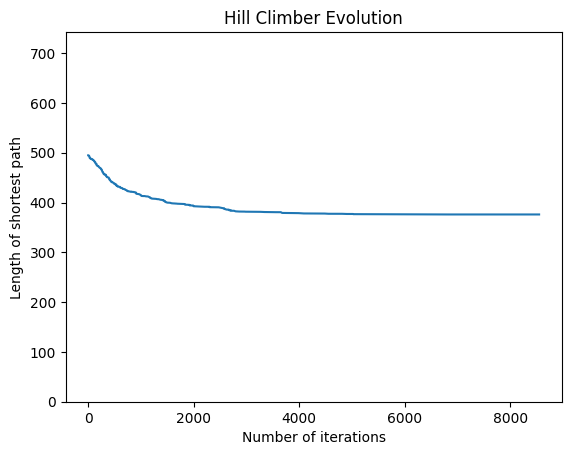

In [432]:
plt.ylim(0,1.5*max(shortest_iteration_series[:,1]))
plt.plot(shortest_iteration_series[:,0],shortest_iteration_series[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Length of shortest path")
plt.title("Hill Climber Evolution")
plt.show()

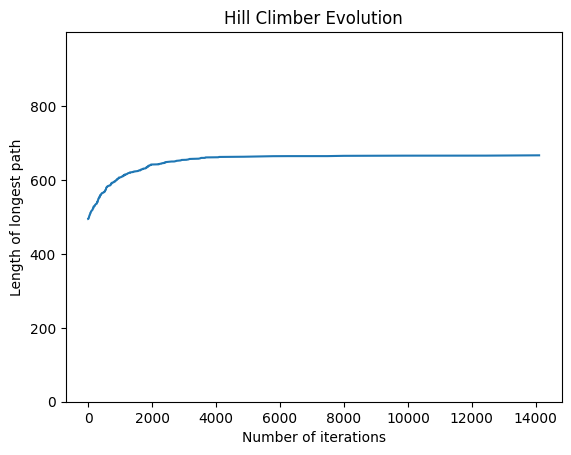

In [433]:
plt.ylim(0,1.5*max(longest_iteration_series[:,1]))
plt.plot(longest_iteration_series[:,0],longest_iteration_series[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Length of longest path")
plt.title("Hill Climber Evolution")
plt.show()

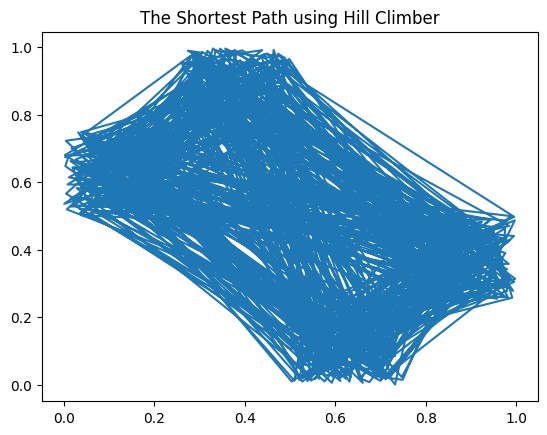

In [438]:
plt.plot(shortest_path[:,0],shortest_path[:,1])
plt.title("The Shortest Path using Hill Climber")
plt.show()


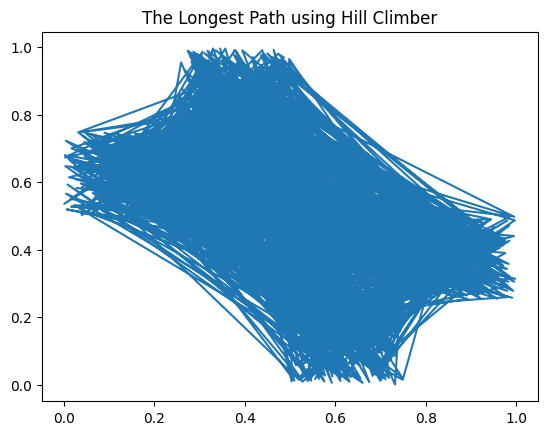

In [439]:
plt.plot(longest_path[:,0],longest_path[:,1])
plt.title("The Longest Path using Hill Climber")
plt.show()

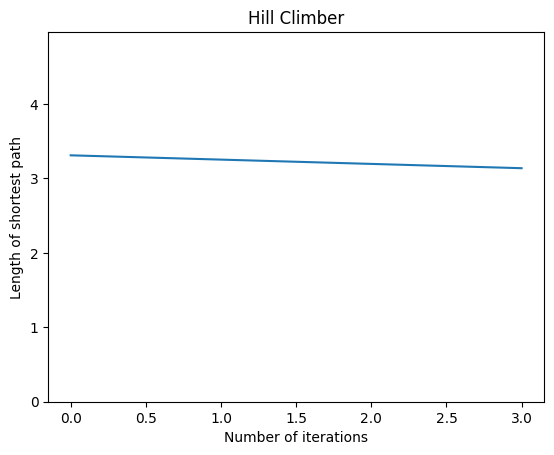

In [377]:
plt.ylim(0,1.5*max(output[:,1]))
plt.plot(output[:,0],output[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Length of shortest path")
plt.title("Hill Climber")
plt.show()

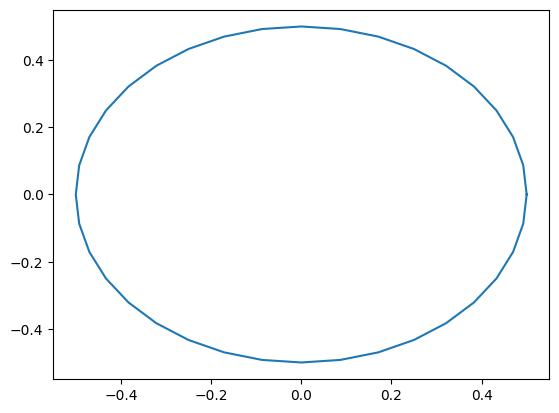

In [378]:
plt.plot(best_path[:,0],best_path[:,1])
plt.show()

In [380]:
test_data = circle_points
current_data = test_data
output = []
current_dist = 0
best_dist = np.infty
#before swapping;initial solution
for i in range(len(current_data)-1):
    node_dist = np.sqrt((current_data[i+1][1]-current_data[i][1])**2+(current_data[i+1][0]-current_data[i][0])**2)
    current_dist += node_dist
current_dist += np.sqrt((current_data[len(current_data)-1][1]-current_data[0][1])**2+(current_data[len(current_data)-1][0]-current_data[0][0])**2)
#for epoch in tqdm(range(1000000)):
best_results=[]
best_results.append((0,current_dist,current_data))
neighbours = []
for m in tqdm(range(len(current_data))):
    for n in range(m+1,len(current_data)):
        new_data = current_data.copy()
        new_data[m] = current_data[n]
        new_data[n] = current_data[m]
        #neighbours.append(new_data)
        new_dist = 0
        for point in new_data:
            new_dist += np.sqrt((new_data[i+1][1]-new_data[i][1])**2+(new_data[i+1][0]-new_data[i][0])**2)
        new_dist += np.sqrt((new_data[len(new_data)-1][1]-new_data[0][1])**2+(new_data[len(new_data)-1][0]-new_data[0][0])**2)
        if new_dist < current_dist:
            best_results.append((m*1000+n,new_dist,new_data))
            current_dist = new_dist
            current_data = new_data
                
               
            
            
            
            
'''    index_a, index_b = random.sample(range(len(iter_data)), 2)
    iter_data[index_a], iter_data[index_b] = iter_data[index_b], iter_data[index_a]
    new_data = iter_data #after swapping
    new_dist = 0
    for i in range(len(new_data)-1):
        node_dist = np.sqrt((new_data[i+1][1]-new_data[i][1])**2+(new_data[i+1][0]-new_data[i][0])**2)
        new_dist += node_dist
    new_dist += np.sqrt((new_data[len(new_data)-1][1]-new_data[0][1])**2+(new_data[len(new_data)-1][0]-new_data[0][0])**2)
    if new_dist<best_dist:
        best_dist = new_dist
        best_path = new_data
        iter_data = new_data
        output.append((epoch,new_dist))'''

  0%|          | 0/37 [00:00<?, ?it/s]

'    index_a, index_b = random.sample(range(len(iter_data)), 2)\n    iter_data[index_a], iter_data[index_b] = iter_data[index_b], iter_data[index_a]\n    new_data = iter_data #after swapping\n    new_dist = 0\n    for i in range(len(new_data)-1):\n        node_dist = np.sqrt((new_data[i+1][1]-new_data[i][1])**2+(new_data[i+1][0]-new_data[i][0])**2)\n        new_dist += node_dist\n    new_dist += np.sqrt((new_data[len(new_data)-1][1]-new_data[0][1])**2+(new_data[len(new_data)-1][0]-new_data[0][0])**2)\n    if new_dist<best_dist:\n        best_dist = new_dist\n        best_path = new_data\n        iter_data = new_data\n        output.append((epoch,new_dist))'

In [314]:
len(neighbours)

55

In [381]:
best_results

[(0,
  3.1376067389156956,
  [(0.5, 0.0),
   (0.492403876506104, 0.08682408883346517),
   (0.4698463103929542, 0.17101007166283436),
   (0.43301270189221935, 0.24999999999999997),
   (0.383022221559489, 0.3213938048432696),
   (0.3213938048432697, 0.383022221559489),
   (0.25000000000000006, 0.4330127018922193),
   (0.1710100716628344, 0.46984631039295416),
   (0.08682408883346521, 0.492403876506104),
   (3.061616997868383e-17, 0.5),
   (-0.08682408883346515, 0.492403876506104),
   (-0.17101007166283436, 0.4698463103929542),
   (-0.2499999999999999, 0.43301270189221935),
   (-0.3213938048432697, 0.383022221559489),
   (-0.38302222155948895, 0.32139380484326974),
   (-0.43301270189221935, 0.24999999999999997),
   (-0.46984631039295416, 0.17101007166283444),
   (-0.492403876506104, 0.08682408883346535),
   (-0.5, 6.123233995736766e-17),
   (-0.49240387650610407, -0.08682408883346501),
   (-0.4698463103929542, -0.17101007166283433),
   (-0.4330127018922194, -0.24999999999999986),
   (-0.3

In [387]:
best_results_path = np.asarray(best_results[0][2])

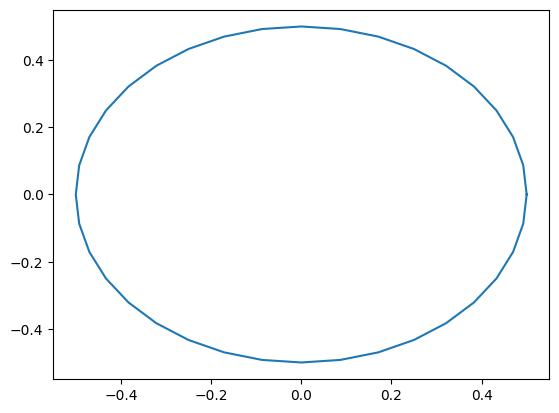

In [388]:
plt.plot(best_results_path[:,0],best_results_path[:,1])
plt.show()